In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 1: 
# Overall, there are more male than female authors who publish in the area of computer science. 

In [1]:
# >>> Preparation
# Import Data
import pandas

print("Importing names... ")
names = pandas.read_csv("../_data/names_cat_i3.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8
(David) Jing Dai            (David) Jing Dai          male        1      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      8
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6


In [2]:
# Calculate amount of authors by gender
print("Calculating the amount of female, male and unclassified authors...")

n_authors_f_min = names[(names['score'] >= 5) & (names['likely_gender'] == 'female')].count()['likely_gender']
n_authors_m_min = names[(names['score'] >= 5) & (names['likely_gender'] == 'male')].count()['likely_gender']
n_authors_u_max = names[(names['score'] < 5)].count()['likely_gender']

print("There are {} female, {} male and {} unclassified author names.".format(n_authors_f_min, n_authors_m_min, n_authors_u_max))

Calculating the amount of female, male and unclassified authors...
There are 144198 female, 1112117 male and 1050103 unclassified author names.


In [3]:
# >>> Testing
# Chi Square Test for distribution

print("Executing Chi Square Test to see if observed distribution of men and women is different than expected.")

from scipy.stats import chisquare
total = n_authors_f_min + n_authors_m_min
exp_f = total / 2
exp_m = total / 2
X, p = chisquare([n_authors_f_min, n_authors_m_min], f_exp=[exp_f, exp_m])

print("Test returned Chi={} with two-sided p-value={}".format(X, p))

Executing Chi Square Test to see if observed distribution of men and women is different than expected.
Test returned Chi=745726.3429641451 with two-sided p-value=0.0


In [4]:
# >>> Visualization
# Preparation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# These settings are for the pgf format to fit nicely into a latex document.
mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

Visualizing amount of authors per gender...
Graphs saved to ../_graphs/h1/authors_by_gender_2


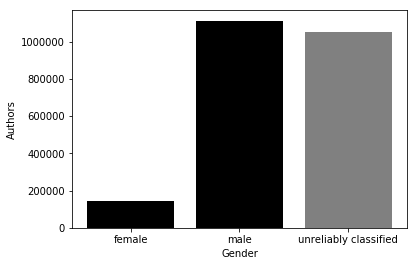

In [5]:
# H1 - if all unclassified were women
print("Visualizing amount of authors per gender...")

plt.bar(["female", "male"], [n_authors_f_min, n_authors_m_min], color="black")
plt.bar(["unreliably classified"], [n_authors_u_max], color="grey")
plt.xlabel("Gender")
plt.ylabel("Authors")
plt.savefig('../_graphs/h1/authors_by_gender_2.pdf')
plt.savefig('../_graphs/h1/authors_by_gender_2.pgf')

print("Graphs saved to ../_graphs/h1/authors_by_gender_2")

In [ ]:
# >>> Evaluation
# Hypothesis 1 is correct because p < 0.05
# Overall, there are more male than female authors.